In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('archive/spam.csv', encoding = 'latin1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
df.rename(columns = { 'v1' : 'tag' , 'v2' : 'message'}, inplace = True)
print(df.head())

    tag                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
df['tag'] = labeler.fit_transform(df['tag'])
print(df.head())

   tag                                            message
0    0  Go until jurong point, crazy.. Available only ...
1    0                      Ok lar... Joking wif u oni...
2    1  Free entry in 2 a wkly comp to win FA Cup fina...
3    0  U dun say so early hor... U c already then say...
4    0  Nah I don't think he goes to usf, he lives aro...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tag      5572 non-null   int32 
 1   message  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [7]:
df.shape

(5572, 2)

In [8]:
#remove duplicates
df= df.drop_duplicates(keep = 'first')
df.shape

(5169, 2)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1,stop_words = 'english', lowercase = True)
X = vectorizer.fit_transform(df['message'])
print(X)

  (0, 8026)	0.19575229718355341
  (0, 1051)	0.349887876326219
  (0, 3494)	0.1638521896261678
  (0, 1994)	0.2951265280780472
  (0, 1701)	0.3338712087191626
  (0, 4349)	0.2951265280780472
  (0, 8227)	0.2470765252568781
  (0, 3534)	0.195355289190792
  (0, 1703)	0.2951265280780472
  (0, 1271)	0.265351062399719
  (0, 2271)	0.2702952522134921
  (0, 5741)	0.2730206060547111
  (0, 4224)	0.349887876326219
  (1, 5369)	0.5464988818914979
  (1, 8134)	0.4304438402468376
  (1, 4192)	0.5233434480300876
  (1, 4385)	0.406925248497845
  (1, 5343)	0.2767319100209511
  (2, 77)	0.23979791195963693
  (2, 1128)	0.16835091112431685
  (2, 6062)	0.16835091112431685
  (2, 7701)	0.12497279140116638
  (2, 7028)	0.20226686886123935
  (2, 6010)	0.17884885821587568
  (2, 6115)	0.16559535588730967
  :	:
  (5164, 5118)	0.24570931529408643
  (5164, 8202)	0.19327861567713003
  (5164, 2000)	0.18810007025693273
  (5164, 5894)	0.1966666491247667
  (5164, 6062)	0.2330967022586123
  (5165, 2907)	0.6008827847681286
  (5165, 32

In [10]:
X

<5169x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 39585 stored elements in Compressed Sparse Row format>

In [11]:
y = df['tag'].to_numpy()
print(y)

[0 0 1 ... 0 0 0]


In [12]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size = 0.2)

In [14]:
# function to evaluate model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1_score_val = f1_score(true_labels, predicted_labels)
    confusion_matrix_val = confusion_matrix(true_labels, predicted_labels)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score_val)
    print("Confusion Matrix:")
    print(confusion_matrix_val)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    sns.lineplot(x = fpr, y = tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

Accuracy: 0.965183752417795
Precision: 1.0
Recall: 0.7517241379310344
F1 Score: 0.8582677165354331
Confusion Matrix:
[[889   0]
 [ 36 109]]


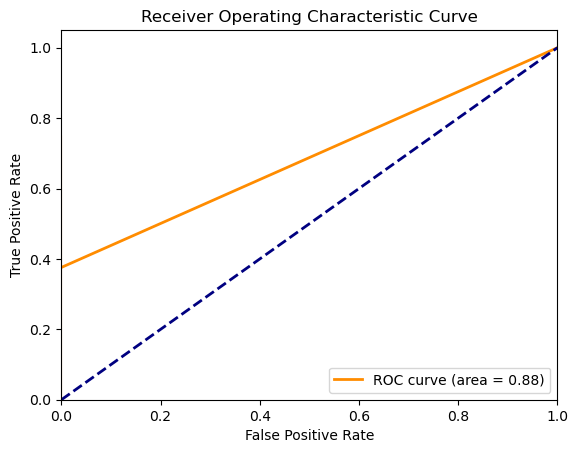

In [15]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)
calculate_metrics(y_test, mnb_y_pred)

Accuracy: 0.9458413926499033
Precision: 0.978494623655914
Recall: 0.6275862068965518
F1 Score: 0.7647058823529411
Confusion Matrix:
[[887   2]
 [ 54  91]]


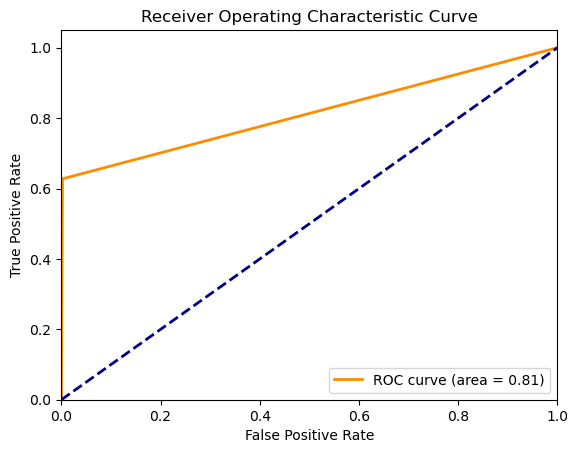

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
calculate_metrics(y_test, lr_y_pred)

Accuracy: 0.9709864603481625
Precision: 0.9914529914529915
Recall: 0.8
F1 Score: 0.8854961832061069
Confusion Matrix:
[[888   1]
 [ 29 116]]


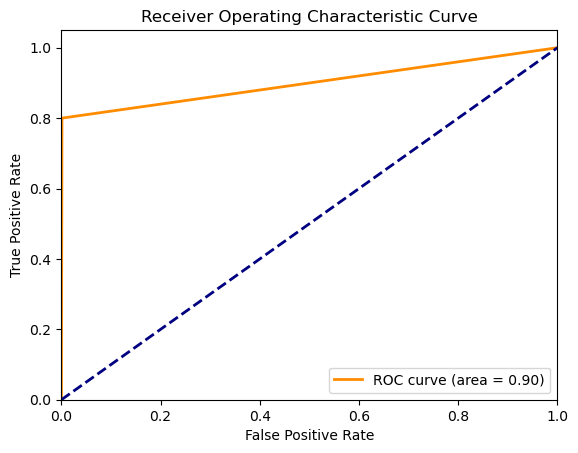

In [17]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
calculate_metrics(y_test, svc_y_pred)